<a href="https://colab.research.google.com/github/Panthera0nca/CRM/blob/main/02_Archivos_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulación de archivos CSV

Workshop: Masterclass 4.0 --- Ingelearn

Instructor: Ignacio Lavaggi

Los archivos CSV son una de las formas más comunes de almacenar información.
Son aimples archivos de texto, que separan las "columnas" usando algún caracter, usualmente la coma "," o el punto y coma ";"

Ejemplo:

Nro_Medicion,Presion,Temperatura,Humedad

1                     ,10         ,20                 ,4

2                     ,11         ,21                 ,3

## Paso 1: Leer los datos

In [3]:
import pandas as pd
# Si queremos leer un archivo local:
#df = pd.read_csv("PetroleoArg.csv", delimiter=",")

# ----------------------------------------------------------
# Si queremos leer un archivo remoto, como en Google Drive:

#1. Pegar el enlace desde "compartir" de Google Drive. Debe ser un archivo menor a 100 MB.
url = 'https://drive.google.com/file/d/1cgX4y1tfwF1XeqkPG3eVqKYouLCLCjOW/view?usp=sharing'
# 2. Esta línea es auxiliar, no se modifica.
ruta = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

#Leemos el archivo
df = pd.read_csv(ruta)


In [4]:
df.head()

,empresa,anio,mes,provincia,cantidad,indice_tiempo,areayacimiento,concepto,cuenca
0,YPF S.A.,2009,1,Neuquén,0.00,2009-01,LOMA LA LATA ESTE,Producción Primaria (m3),NEUQUINA
1,YPF S.A.,2009,1,Neuquén,0.00,2009-01,PUESTO HERNANDEZ,Producción Primaria (m3),NEUQUINA
2,YPF S.A.,2009,1,Neuquén,2099.07,2009-01,SIERRA BARROSA,Producción de Agua (m3),NEUQUINA
3,YPF S.A.,2009,1,Neuquén,0.00,2009-01,CAMPAMENTO UNO,Producción de Condensado (m3),NEUQUINA
4,YPF S.A.,2009,1,Neuquén,0.00,2009-01,VANGUARDIA,Producción de Condensado (m3),NEUQUINA


In [5]:
df.shape

(237600, 9)

## Paso 2: Interpretar los datos
Vamos a analizar la información. Separamos aquellas columnas que nos interesan y descartamos las que no

In [6]:
columnas_interesantes = ["empresa","anio","mes","provincia","cantidad","indice_tiempo","areayacimiento","concepto","cuenca"]

datos = df[columnas_interesantes]
datos

,empresa,anio,mes,provincia,cantidad,indice_tiempo,areayacimiento,concepto,cuenca
0,YPF S.A.,2009,1,Neuquén,0.00,2009-01,LOMA LA LATA ESTE,Producción Primaria (m3),NEUQUINA
1,YPF S.A.,2009,1,Neuquén,0.00,2009-01,PUESTO HERNANDEZ,Producción Primaria (m3),NEUQUINA
2,YPF S.A.,2009,1,Neuquén,2099.07,2009-01,SIERRA BARROSA,Producción de Agua (m3),NEUQUINA
3,YPF S.A.,2009,1,Neuquén,0.00,2009-01,CAMPAMENTO UNO,Producción de Condensado (m3),NEUQUINA
4,YPF S.A.,2009,1,Neuquén,0.00,2009-01,VANGUARDIA,Producción de Condensado (m3),NEUQUINA
...,...,...,...,...,...,...,...,...,...
237595,YPF S.A.,2023,6,Neuquén,0.00,2023-06,EL TOMILLO,Producción No Convencional (m3),NEUQUINA
237596,YPF S.A.,2023,6,Neuquén,0.00,2023-06,BAJO DEL TORO NORTE,Densidad Media (Ton/m3),NEUQUINA
237597,YPF S.A.,2023,6,Neuquén,0.00,2023-06,BANDURRIA SUR,Densidad Media (Ton/m3),NEUQUINA
237598,YPF S.A.,2023,6,Neuquén,0.00,2023-06,BAJO DEL TORO,Densidad Media (Ton/m3),NEUQUINA


## Paso 3: Procesar los datos
A partir de aquí, tenemos nuestros datos listos para filtrarlos, agruparlos, y graficarlos, revelando más información que la que hay disponible a simple vista mirando el DataFrame

### Agrupamos los datos por año

In [7]:
promEmpresa = datos.groupby(["anio"]).cantidad.mean()
promEmpresa

,cantidad
anio,
2009,5455.136158
2010,5346.816784
2011,4585.593061
2012,4219.106089
2013,4106.820889
2014,6547.464691
2015,7716.512027
2016,7444.799793
2017,6565.929012


Lo convertimos a "tabla" agregando nuevamente los índices

In [8]:
promEmpresa = promEmpresa.reset_index()
promEmpresa

,anio,cantidad
0,2009,5455.136158
1,2010,5346.816784
2,2011,4585.593061
3,2012,4219.106089
4,2013,4106.820889
5,2014,6547.464691
6,2015,7716.512027
7,2016,7444.799793
8,2017,6565.929012
9,2018,6303.282124


Rellenamos los valores inválidos con ceros

In [9]:
promEmpresa = promEmpresa.fillna("0")
promEmpresa

,anio,cantidad
0,2009,5455.136158
1,2010,5346.816784
2,2011,4585.593061
3,2012,4219.106089
4,2013,4106.820889
5,2014,6547.464691
6,2015,7716.512027
7,2016,7444.799793
8,2017,6565.929012
9,2018,6303.282124


## Paso 4: Graficamos

Usamos las bibliotecas MatPlotLib que vimos anteriormente, y Seaborn para darle un mejor formato

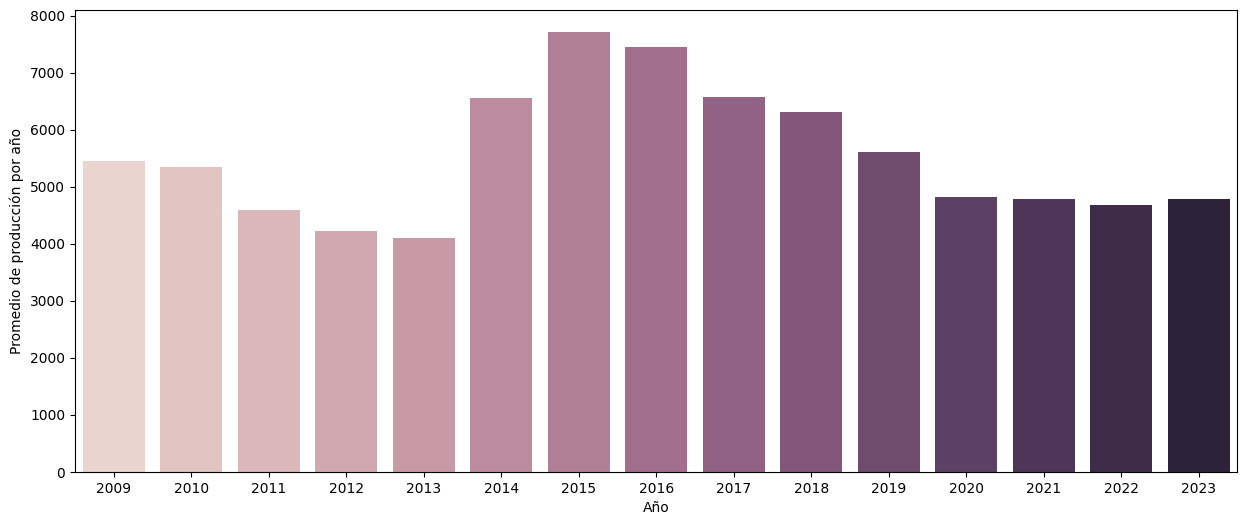

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
ax = sns.barplot(x="anio", y="cantidad", hue="anio", data=promEmpresa, lw=0)

plt.xlabel('Año')
plt.ylabel('Promedio de producción por año')
plt.savefig('leyenda.png', bbox_inches='tight')
# OPCIONAL: Eliminar la leyenda del gráfico
plt.legend().remove()

# OPCIONAL: Guardar el gráfico en la PC o el PLC
plt.savefig("Promedios.png")
# Mostrar el gráfico sin leyenda
plt.show()


## Paso 5: Vamos más allá!

Filtremos la producción, pero solamente de una región.


In [11]:
soloYPF = datos.query("empresa == 'YPF S.A.' and provincia == 'Neuquén'")
soloYPF

,empresa,anio,mes,provincia,cantidad,indice_tiempo,areayacimiento,concepto,cuenca
0,YPF S.A.,2009,1,Neuquén,0.00,2009-01,LOMA LA LATA ESTE,Producción Primaria (m3),NEUQUINA
1,YPF S.A.,2009,1,Neuquén,0.00,2009-01,PUESTO HERNANDEZ,Producción Primaria (m3),NEUQUINA
2,YPF S.A.,2009,1,Neuquén,2099.07,2009-01,SIERRA BARROSA,Producción de Agua (m3),NEUQUINA
3,YPF S.A.,2009,1,Neuquén,0.00,2009-01,CAMPAMENTO UNO,Producción de Condensado (m3),NEUQUINA
4,YPF S.A.,2009,1,Neuquén,0.00,2009-01,VANGUARDIA,Producción de Condensado (m3),NEUQUINA
...,...,...,...,...,...,...,...,...,...
237595,YPF S.A.,2023,6,Neuquén,0.00,2023-06,EL TOMILLO,Producción No Convencional (m3),NEUQUINA
237596,YPF S.A.,2023,6,Neuquén,0.00,2023-06,BAJO DEL TORO NORTE,Densidad Media (Ton/m3),NEUQUINA
237597,YPF S.A.,2023,6,Neuquén,0.00,2023-06,BANDURRIA SUR,Densidad Media (Ton/m3),NEUQUINA
237598,YPF S.A.,2023,6,Neuquén,0.00,2023-06,BAJO DEL TORO,Densidad Media (Ton/m3),NEUQUINA


Graficamos, ésta vez con líneas

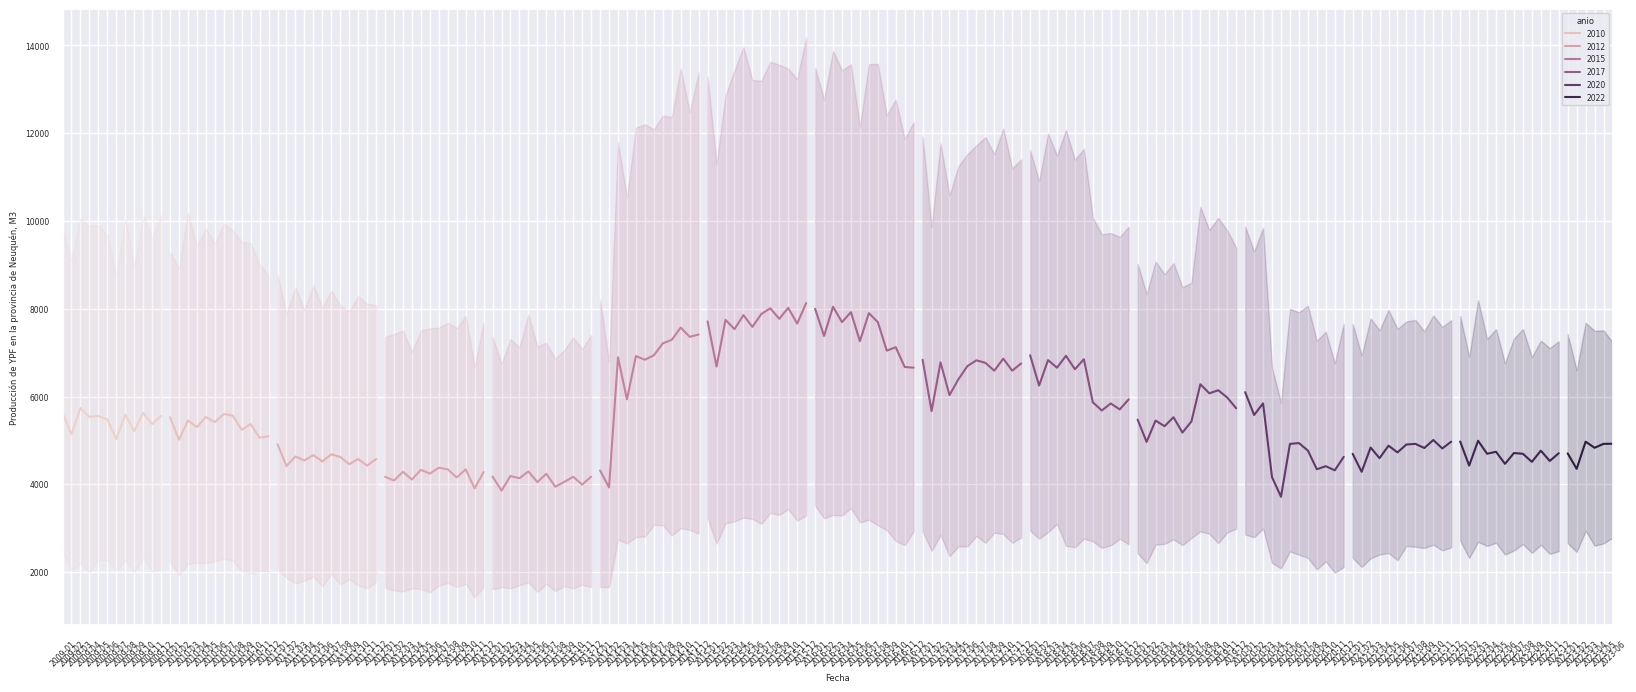

In [12]:
plt.figure(figsize=(20,8))
sns.set(font_scale=0.5)
ax = sns.lineplot(x="indice_tiempo", y="cantidad", hue="anio", data=soloYPF)
plt.xlabel('Fecha')
plt.style.use('ggplot')
plt.autoscale(enable=True, axis='x', tight=True)

plt.ylabel('Producción de YPF en la provincia de Neuquén, M3')
plt.xticks(rotation=45)
plt.show()
